# Predicting Health Insurance

---

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

---

## Loading Data

In [2]:
df = pd.read_csv('../HealthInsurancePredictor/data/customer.csv')

df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


---

## Data Exploration

In [3]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(72458, 15)

In [4]:
# Display information about the DataFrame including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


In [5]:
# Display summary statistics of the DataFrame
df.describe()

,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [6]:
# Print the number of null values for each column
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64


In [7]:
# Print the number of duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
0


In [8]:
# Print the number of unique values for each column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
Unnamed: 0        72458
custid            72458
sex                   2
is_employed           2
income             4445
marital_status        4
health_ins            2
housing_type          4
num_vehicles          7
age                  81
state_of_res         51
code_column          49
gas_usage            57
rooms                 6
recent_move_b         2
dtype: int64


---

## Data Preprocessing

### Brief Analysis of the Columns

#### Unnecessary Columns:

- `Unnamed: 0` - This column functions as an index, so it is irrelevant and can be removed.

- `custid` - The ID of each customer is also unnecessary for the analysis and will be removed as well.

- `code_column` - The column containing the code is likewise irrelevant.

#### Necessary Columns:

- The columns: `sex`, `is_employed`, `income`, `marital_status`, **`health_ins`**, `housing_type`, `num_vehicles`, `age`, `state_of_res`, `gas_usage`, `rooms`, and `recent_move_b` are all relevant for predicting the primary variable **`health_ins`**.


### Drop unnecessary columns

In [9]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'code_column'], errors='ignore')

df.set_index('custid', inplace=True)

df.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
custid,,,,,,,,,,,,
000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,210.0,3,F
000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,3.0,6,T
000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,40.0,3,F
000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,120.0,2,F
000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,3.0,2,F


### Handling missing values

#### Handling missing values in is_employed column

In the `is_employed` column, the missing values represent the individuals that are not in the workforce, such as students or retirees. 

Since the goal of this project is to predict health insurance, it is important to preserve the distinction between:
- Individual who are employed (True)
- Individuals who are not employed (False)
- Individuals who are not in the workforce (Missing values)

Most machine learning algorithms cannot process missing values directly. To address this, we applied **One-Hot Encoding** to the is_employed column, converting it into a binary format suitable for model training. This approach captures all the necessary information while avoiding redundancy.

To encode the `is_employed` column:
1. We created two new binary columns: 
    - `is_employed_True`: 1 if the individual is employed, 0 otherwise
    - `is_employed_NotInWorkforce`: 1 if the individual is not in the workforce, 0 otherwise
2. The third category, not employed, is inferred when both new columns are 0.

In [10]:
# Display the count of unique values for the 'is_employed' column, including NaN values
df['is_employed'].value_counts(dropna=False)

is_employed
True     44630
NaN      25515
False     2313
Name: count, dtype: int64

In [11]:
# Create a copy of the dataset to store transformations
df_processed = df.copy()

# Convert NaN values in 'is_employed' to 'Not in Workforce'
df_processed['is_employed'] = df_processed['is_employed'].fillna('Not in Workforce')

df_processed.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,gas_usage,rooms,recent_move_b
custid,,,,,,,,,,,,
000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,210.0,3,F
000007827_01,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,3.0,6,T
000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,40.0,3,F
000008529_01,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,120.0,2,F
000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,3.0,2,F


In [12]:
# Print the number of null values for each column
print("\nNull values per column:")
print(df_processed.isnull().sum())


Null values per column:
sex                  0
is_employed          0
income               0
marital_status       0
health_ins           0
housing_type      1686
num_vehicles      1686
age                  0
state_of_res         0
gas_usage         1686
rooms                0
recent_move_b     1687
dtype: int64


#### Handling missing values in the rest of the columns

In [13]:
# Check for missing rows in the four columns
missing_housing = df_processed['housing_type'].isnull()
missing_vehicles = df_processed['num_vehicles'].isnull()
missing_gas = df_processed['gas_usage'].isnull()
missing_recent_move = df_processed['recent_move_b'].isnull()

# Combine the masks using logical AND
combined_missing = missing_housing & missing_vehicles & missing_gas & missing_recent_move

# Verify if the counts match and print results
print("Total missing in housing_type:", missing_housing.sum())
print("Total missing in num_vehicles:", missing_vehicles.sum())
print("Total missing in gas_usage:", missing_gas.sum())
print("Total missing in recent_move_b:", missing_recent_move.sum())
print("Rows missing in all four columns:", combined_missing.sum())

Total missing in housing_type: 1686
Total missing in num_vehicles: 1686
Total missing in gas_usage: 1686
Total missing in recent_move_b: 1687
Rows missing in all four columns: 1686


We analyzed the missing values in the columns `housing_type`, `num_vehicles`, `gas_usage`, and `recent_move_b`:
- `housing_type`, `num_vehicles`, and `gas_usage` each have **1,686 missing values**, all overlapping.
- `recent_move_b` has **1,687 missing values**, with one additional row missing only in this column.
- A total of **1,686 rows** have missing values in all four columns.

Since these rows account for only **2.3% of the dataset**, we decided to drop them. This approach ensures data quality while retaining 97.7% of the data for analysis and modeling.

In [14]:
# Drop rows where all four columns are missing
rows_to_drop = df_processed[(df_processed['housing_type'].isnull()) &
                  (df_processed['num_vehicles'].isnull()) &
                  (df_processed['gas_usage'].isnull()) &
                  (df_processed['recent_move_b'].isnull())].index
df_processed = df_processed.drop(rows_to_drop)

# Drop the additional row with only `recent_move_b` missing
df_processed = df_processed[df_processed['recent_move_b'].notnull()]

# Check the number of missing values in each column
print("\nMissing values per column:")
print(df_processed.isnull().sum())


Missing values per column:
sex               0
is_employed       0
income            0
marital_status    0
health_ins        0
housing_type      0
num_vehicles      0
age               0
state_of_res      0
gas_usage         0
rooms             0
recent_move_b     0
dtype: int64


### Handling outliers

In [15]:
# Numerical features to evaluate for outliers
numerical_features = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms']

#### Detecting outliers

##### Distribution plots 

This section visualizes the distribution of numerical features to observe their overall shape and detect potential skewness or outliers. Features with a strong skew might require transformations before modeling.

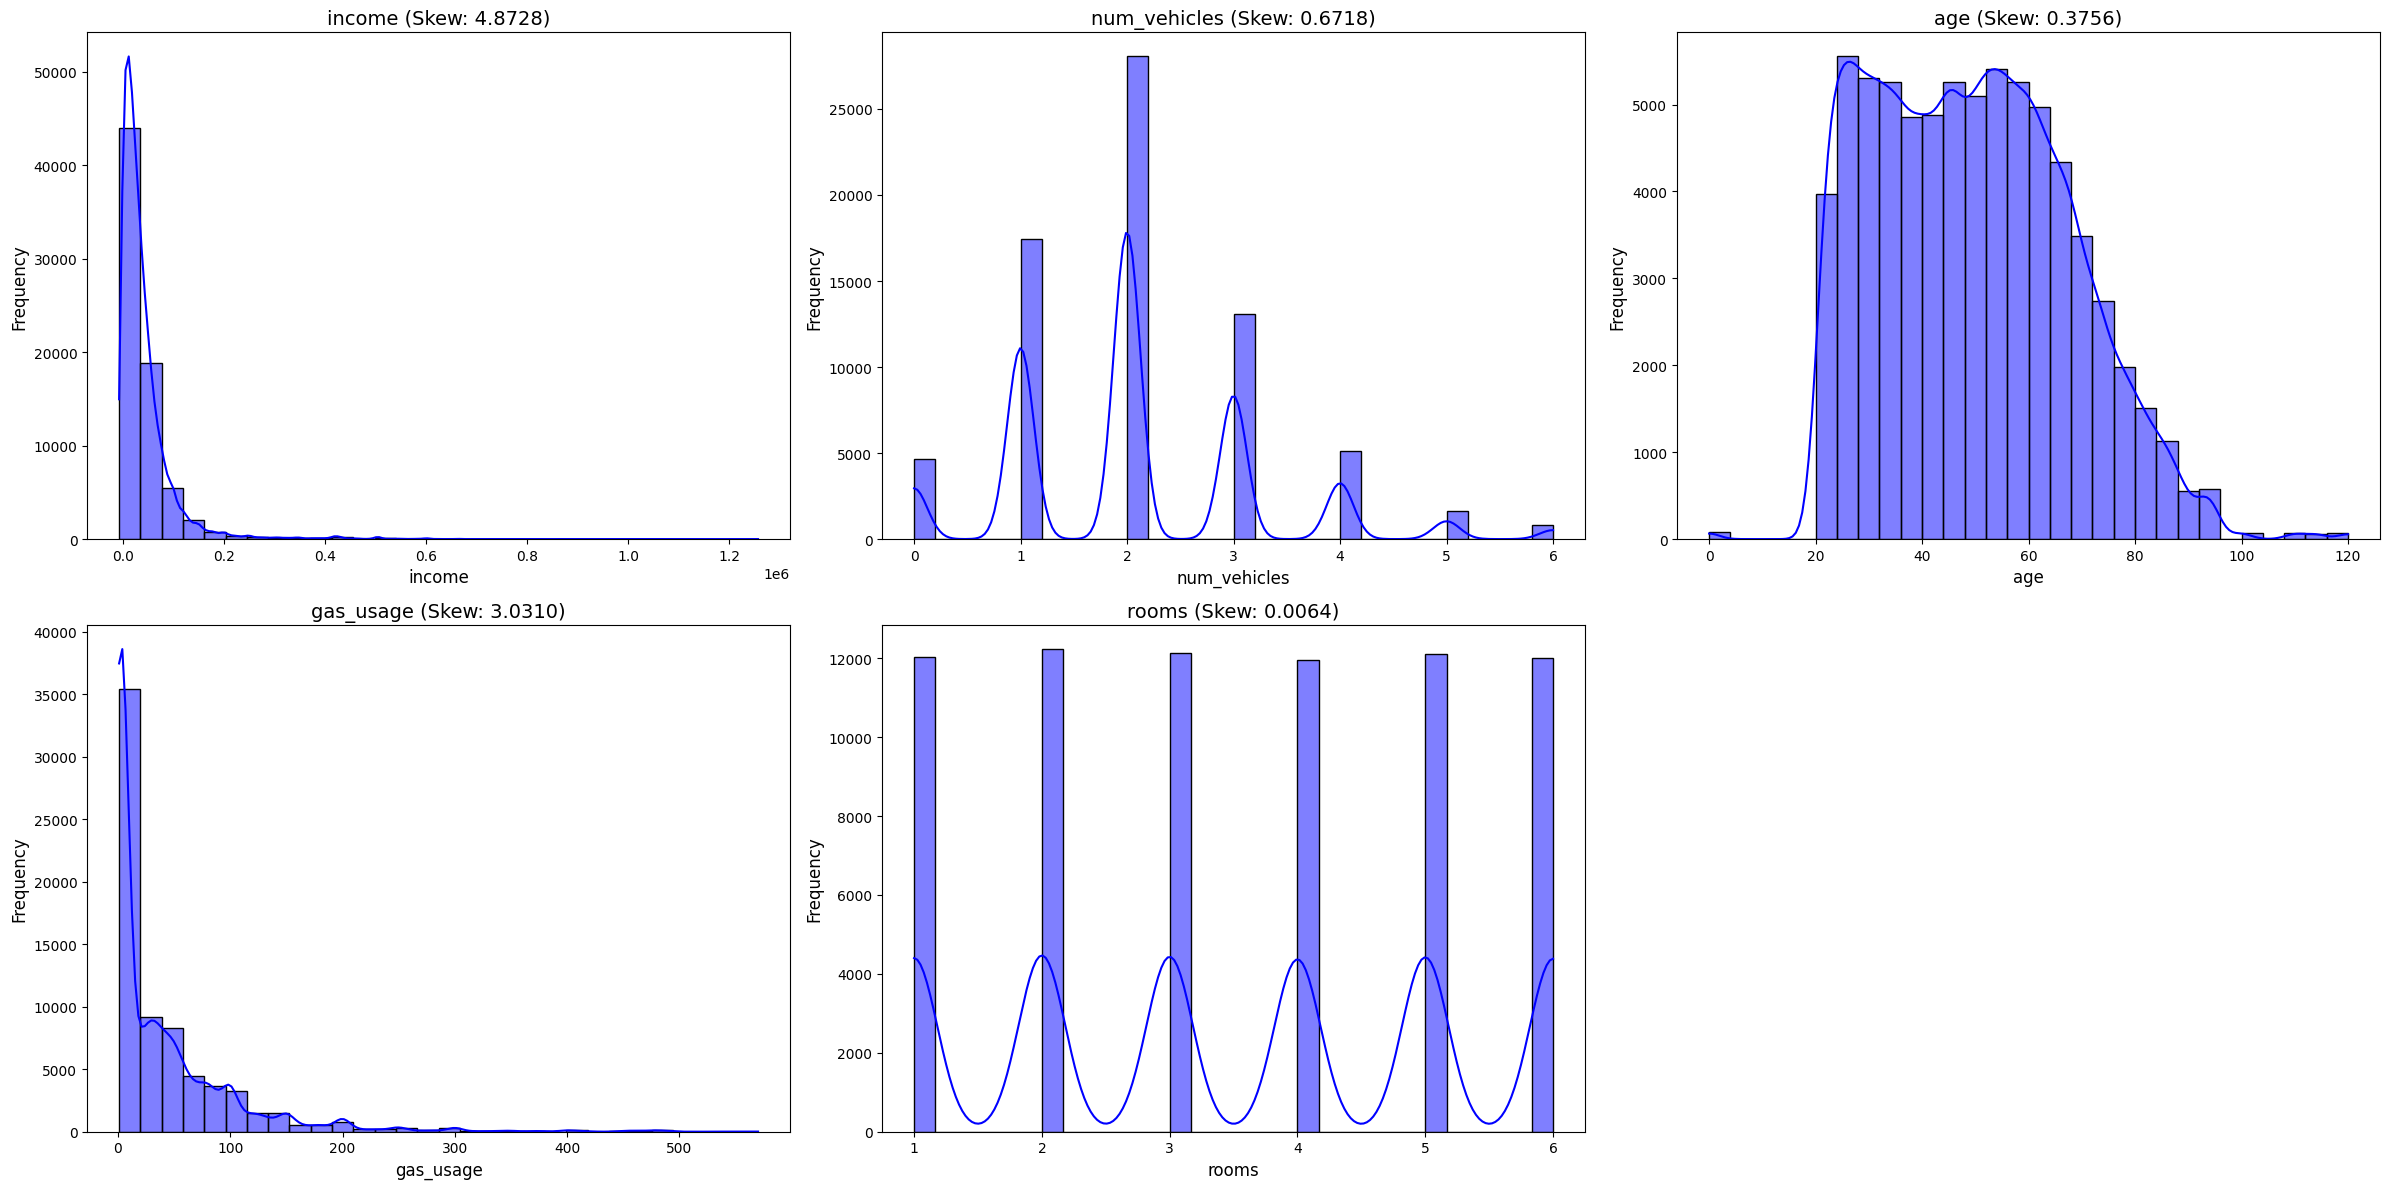

In [16]:
# Plot distribution of numerical features with skewness information
f, axes = plt.subplots(2, 3, figsize=(24, 12)) 
axes = axes.flatten()

# Loop through numerical features
for i, col in enumerate(df[numerical_features].columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'{col} (Skew: {df[col].skew():.4f})', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

##### Normal Probability Plots (Q-Q Plots)

These plots assess how well the data follows a normal distribution. Points deviating from the diagonal line indicate departures from normality, which may suggest outliers or the need for transformations.

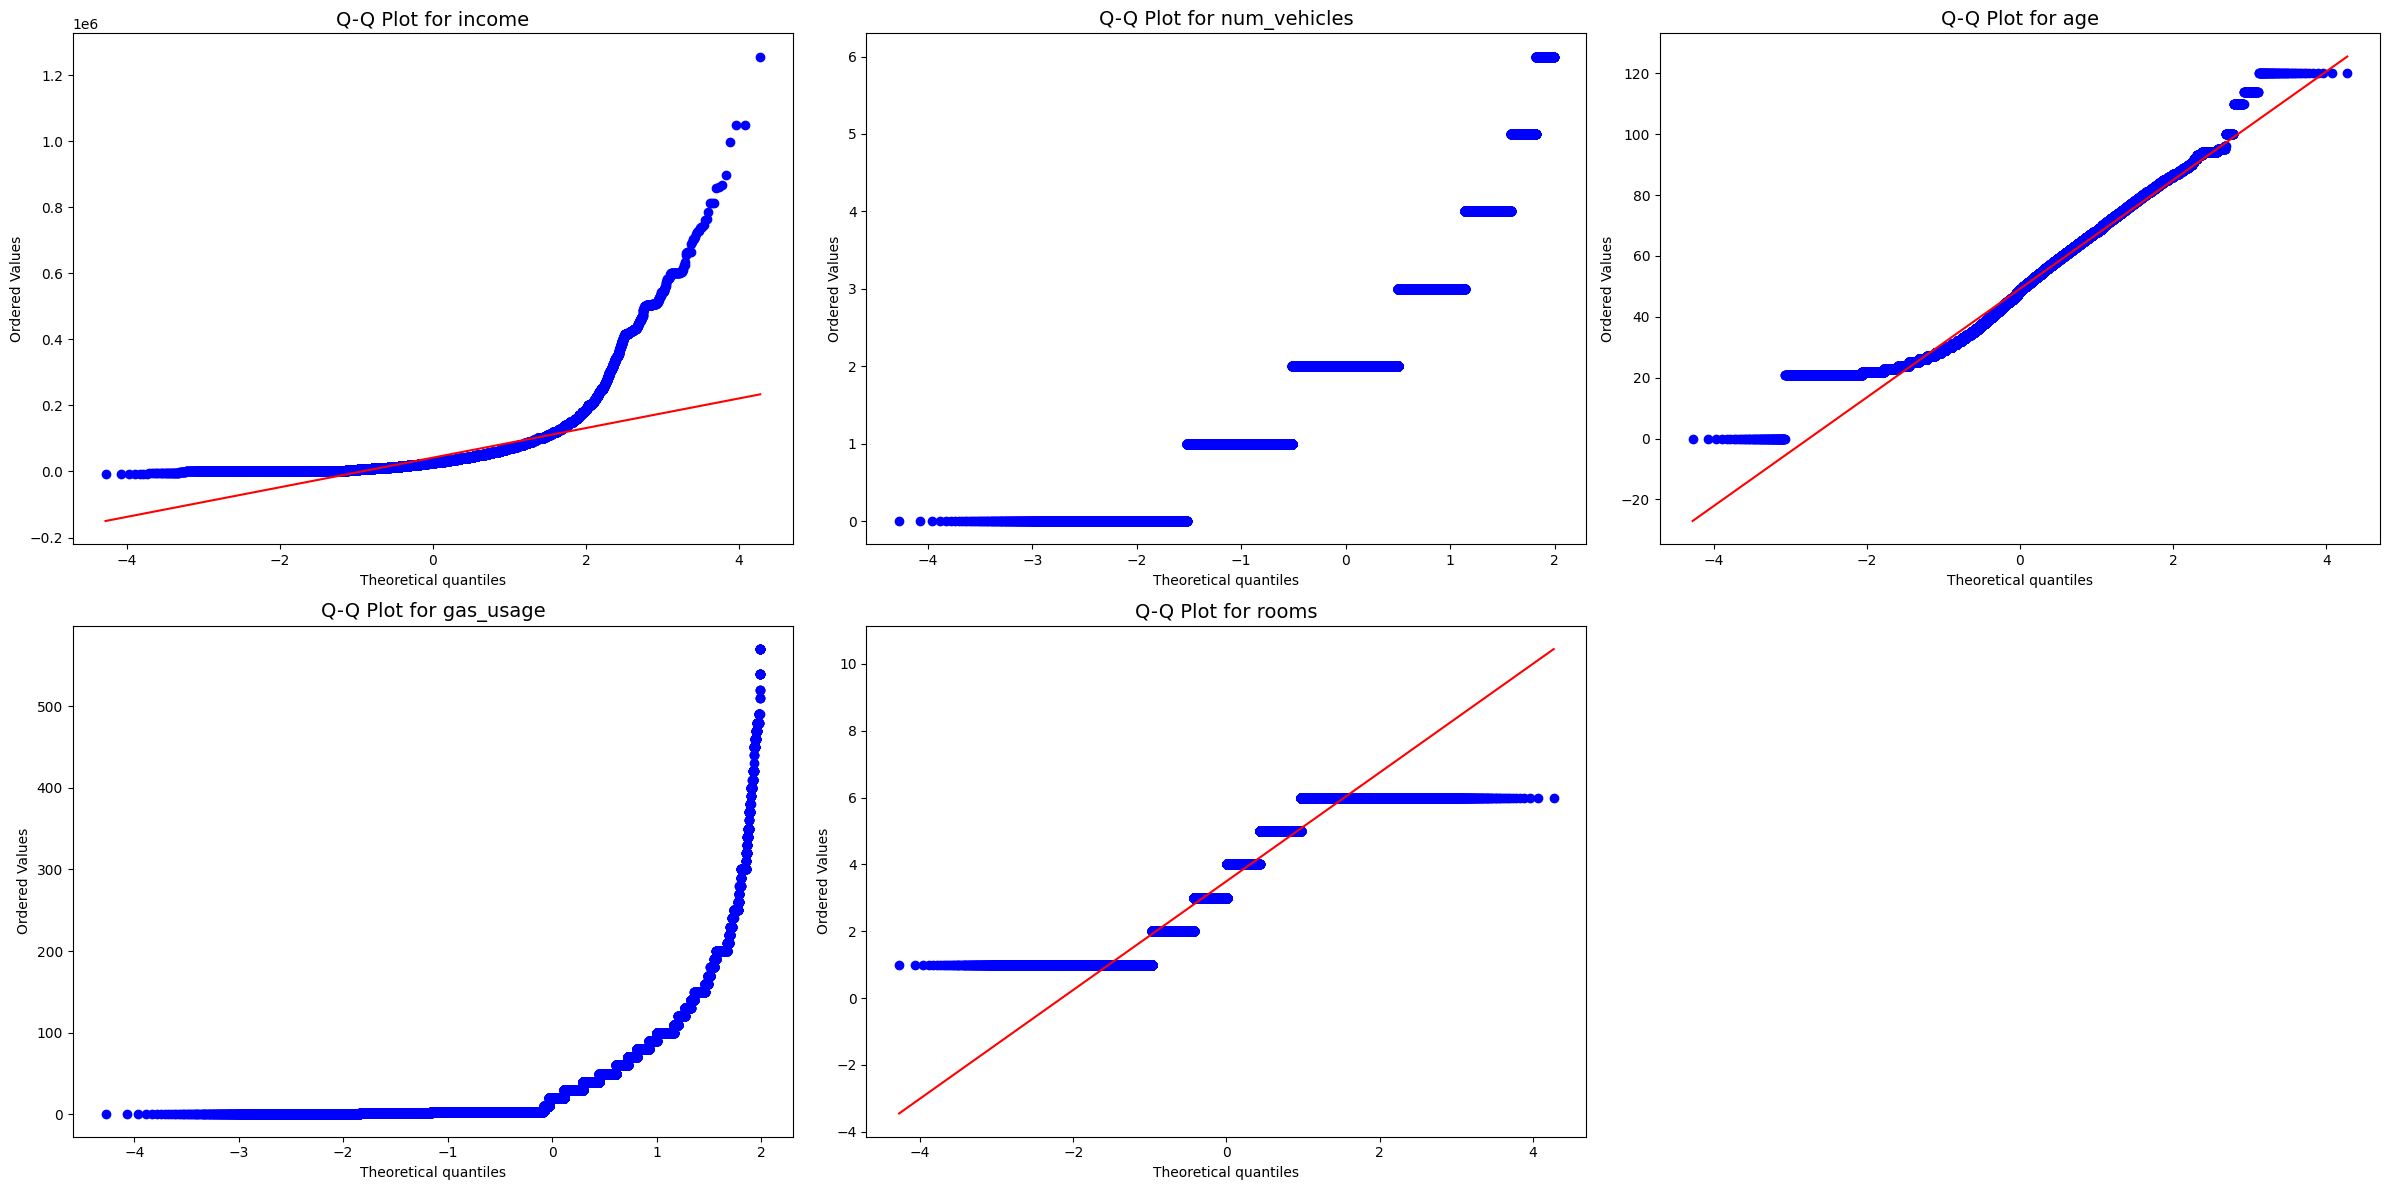

In [17]:
# Q-Q Plots for numerical features
f, axes = plt.subplots(2, 3, figsize=(24, 12)) 
axes = axes.flatten()

# Loop through numerical features
for i, col in enumerate(df[numerical_features].columns):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {col}', fontsize=14)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

##### Box Plots

Boxplots visually represent the spread of data and highlight potential outliers as points outside the whiskers.

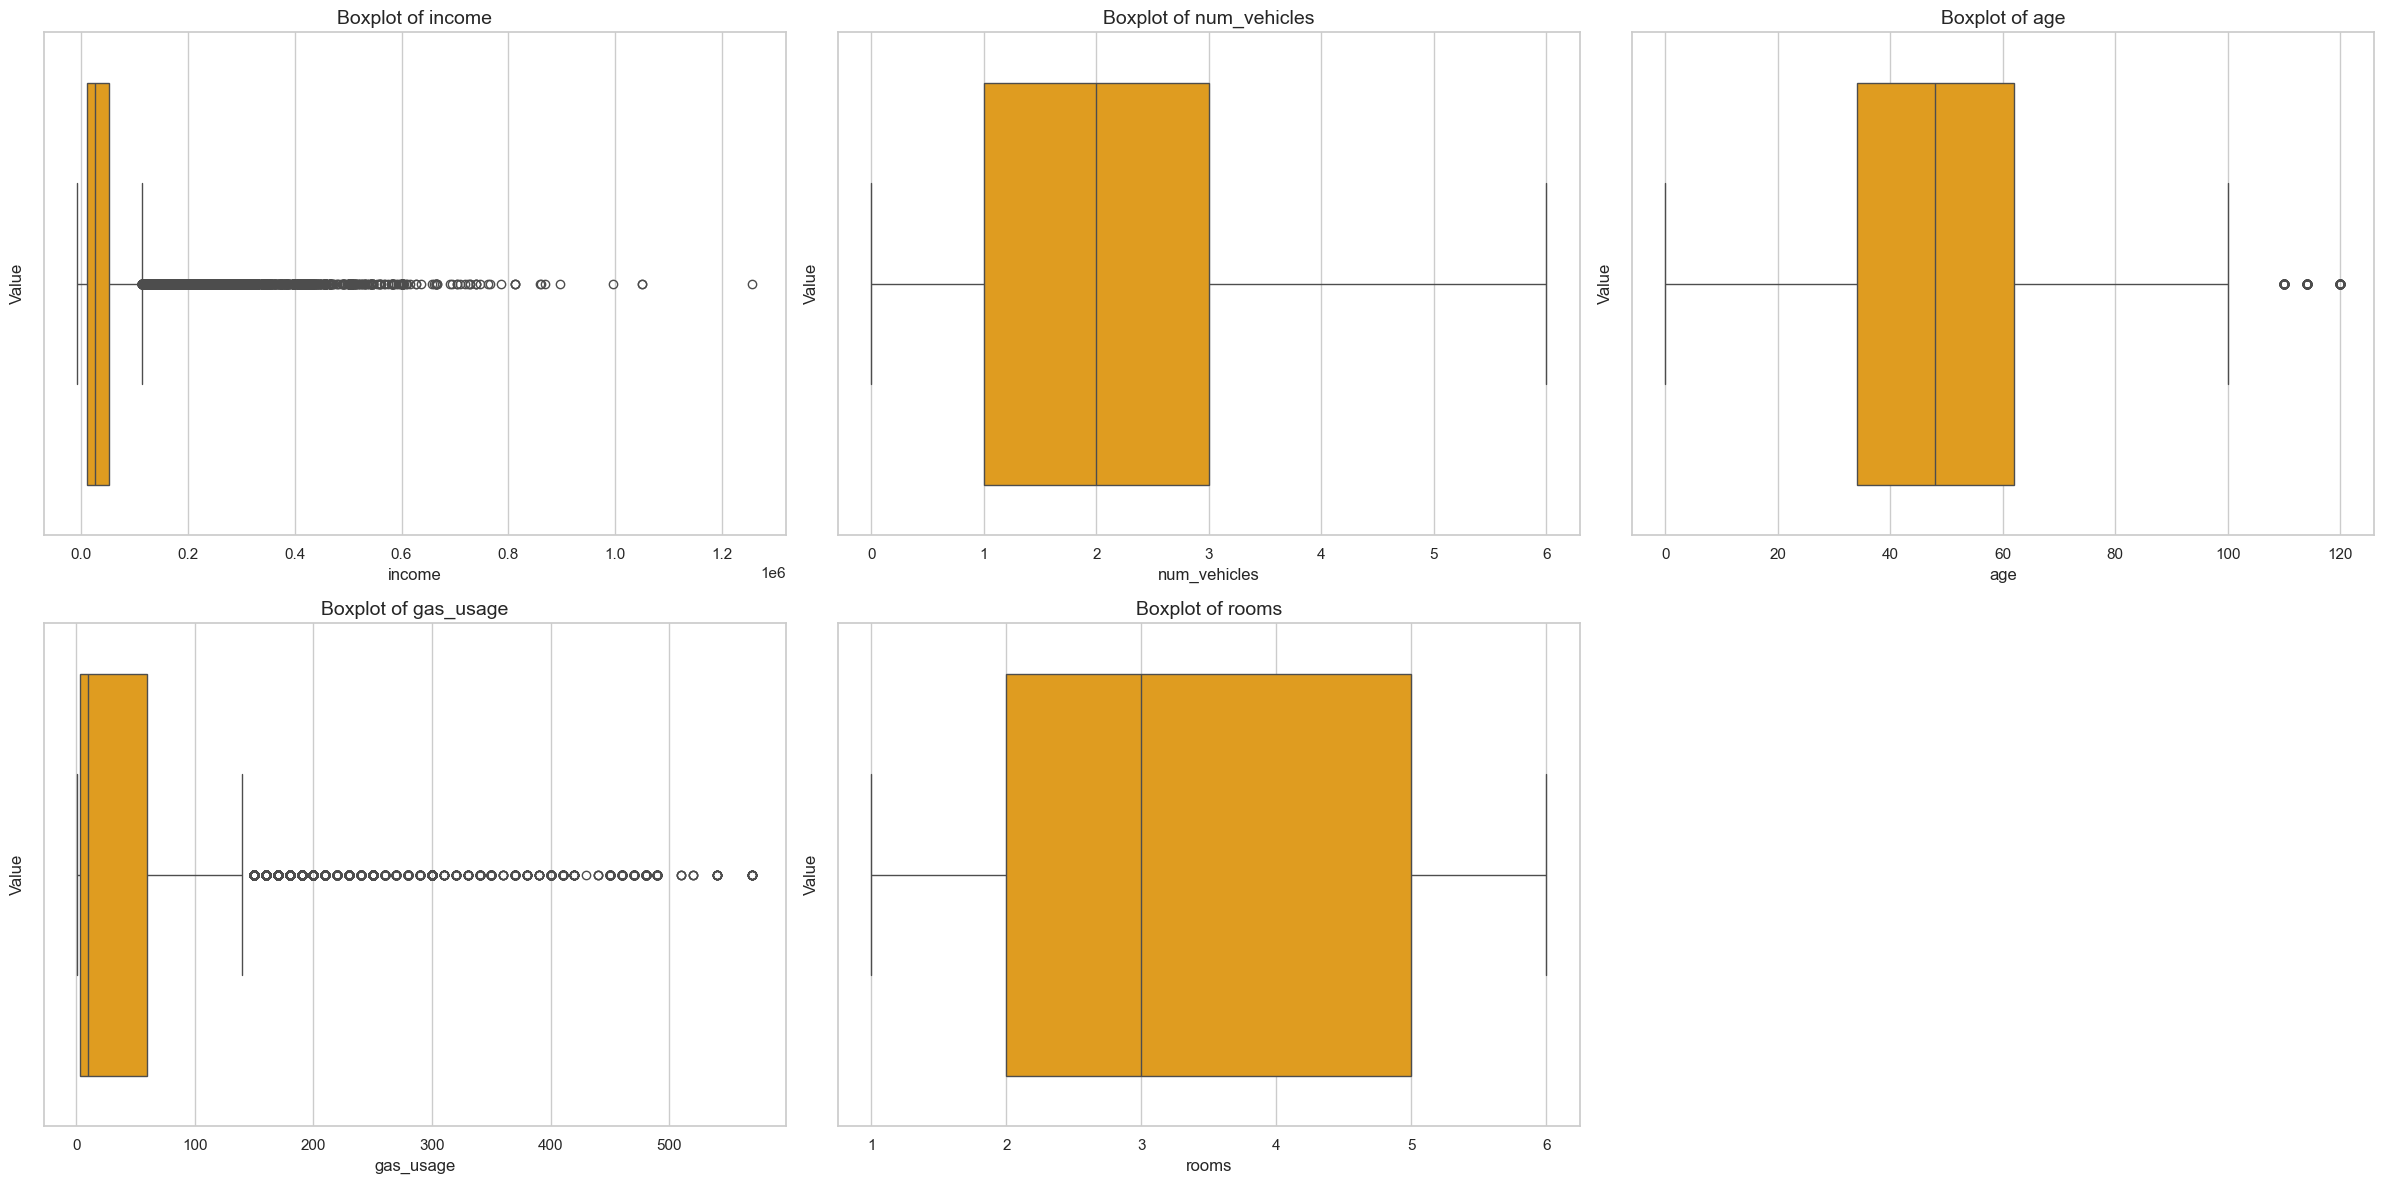

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

f, axes = plt.subplots(2, 3, figsize=(24, 12))  
axes = axes.flatten()

# Loop through numerical features and plot each
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

# Hide unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


##### Scatter Plots

---

### Applying models before handling outliers

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [20]:
# Create a copy of the dataset to store transformations
df_transformed = df_processed.copy()

# Identify categorical columns
categorical_cols = df_transformed.select_dtypes(include=['object']).columns

# Identify binary columns
binary_cols = df_transformed.select_dtypes(include=['bool']).columns

# Convert binary columns to strings
for column in binary_cols:
    df_transformed[column] = df_transformed[column].astype(str)

# Convert categorical columns to strings
for column in categorical_cols:
    df_transformed[column] = df_transformed[column].astype(str)

# Initialize LabelEncoder for binary columns
label_encoders = {}
for column in binary_cols:
    le = LabelEncoder()
    df_transformed[column] = le.fit_transform(df_transformed[column])
    label_encoders[column] = le

# Initialize OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to categorical columns
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_transformed[categorical_cols]), columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
df_transformed = df_transformed.drop(columns=categorical_cols).reset_index(drop=True)
df_transformed = pd.concat([df_transformed, df_encoded], axis=1)

df_transformed.index = df_processed.index
df_transformed.index.name = 'custid'

In [21]:
import os
# Save the df_transformed dataset to a CSV file in the directory 'data/preprocessed' (create the directory if it does not exist)
output_dir = 'data/preprocessed'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'customer_transformed.csv')
df_transformed.to_csv(output_file, index=True)

In [22]:
pd.set_option('display.max_columns', None)
df_transformed.head()

,income,health_ins,num_vehicles,age,gas_usage,rooms,sex_Male,is_employed_Not in Workforce,is_employed_True,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented,state_of_res_Alaska,state_of_res_Arizona,state_of_res_Arkansas,state_of_res_California,state_of_res_Colorado,state_of_res_Connecticut,state_of_res_Delaware,state_of_res_District of Columbia,state_of_res_Florida,state_of_res_Georgia,state_of_res_Hawaii,state_of_res_Idaho,state_of_res_Illinois,state_of_res_Indiana,state_of_res_Iowa,state_of_res_Kansas,state_of_res_Kentucky,state_of_res_Louisiana,state_of_res_Maine,state_of_res_Maryland,state_of_res_Massachusetts,state_of_res_Michigan,state_of_res_Minnesota,state_of_res_Mississippi,state_of_res_Missouri,state_of_res_Montana,state_of_res_Nebraska,state_of_res_Nevada,state_of_res_New Hampshire,state_of_res_New Jersey,state_of_res_New Mexico,state_of_res_New York,state_of_res_North Carolina,state_of_res_North Dakota,state_of_res_Ohio,state_of_res_Oklahoma,state_of_res_Oregon,state_of_res_Pennsylvania,state_of_res_Rhode Island,state_of_res_South Carolina,state_of_res_South Dakota,state_of_res_Tennessee,state_of_res_Texas,state_of_res_Utah,state_of_res_Vermont,state_of_res_Virginia,state_of_res_Washington,state_of_res_West Virginia,state_of_res_Wisconsin,state_of_res_Wyoming,recent_move_b_T
custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000006646_03,22000.0,1,0.0,24,210.0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000007827_01,23200.0,1,0.0,82,3.0,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
000008359_04,21000.0,1,2.0,31,40.0,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000008529_01,37770.0,1,1.0,93,120.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000008744_02,39000.0,1,2.0,67,3.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Assuming 'health_ins' is the target variable
X = df_transformed.drop(columns=['health_ins'])
y = df_transformed['health_ins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Decision Tree F1 Score: {f1_dt:.2f}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.86
Decision Tree F1 Score: 0.92
              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1313
           1       0.92      0.92      0.92     12842

    accuracy                           0.86     14155
   macro avg       0.58      0.59      0.58     14155
weighted avg       0.86      0.86      0.86     14155



In [25]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.91
Random Forest F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.46      0.06      0.10      1313
           1       0.91      0.99      0.95     12842

    accuracy                           0.91     14155
   macro avg       0.69      0.52      0.53     14155
weighted avg       0.87      0.91      0.87     14155



In [26]:
# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')
print(f'K-Nearest Neighbors F1 Score: {f1_knn:.2f}')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.90
K-Nearest Neighbors F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.28      0.06      0.10      1313
           1       0.91      0.98      0.95     12842

    accuracy                           0.90     14155
   macro avg       0.60      0.52      0.53     14155
weighted avg       0.85      0.90      0.87     14155



In [27]:
# Initialize the Support Vector Machine model
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.2f}')
print(f'Support Vector Machine F1 Score: {f1_svm:.2f}')
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.91
Support Vector Machine F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1313
           1       0.91      1.00      0.95     12842

    accuracy                           0.91     14155
   macro avg       0.45      0.50      0.48     14155
weighted avg       0.82      0.91      0.86     14155



C:\Users\eduar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eduar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eduar\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [28]:
# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Logistic Regression F1 Score: {f1_lr:.2f}')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.91
Logistic Regression F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.49      0.02      0.03      1313
           1       0.91      1.00      0.95     12842

    accuracy                           0.91     14155
   macro avg       0.70      0.51      0.49     14155
weighted avg       0.87      0.91      0.87     14155



C:\Users\eduar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Initialize the Multi-Layer Perceptron model
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
print(f'Multi-Layer Perceptron Accuracy: {accuracy_mlp:.2f}')
print(f'Multi-Layer Perceptron F1 Score: {f1_mlp:.2f}')
print(classification_report(y_test, y_pred_mlp))


Multi-Layer Perceptron Accuracy: 0.90
Multi-Layer Perceptron F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.40      0.09      0.14      1313
           1       0.91      0.99      0.95     12842

    accuracy                           0.90     14155
   macro avg       0.66      0.54      0.54     14155
weighted avg       0.87      0.90      0.87     14155



---

#### Handling outliers in the 'income' column

In [30]:
df_processed['income'].describe()

count    7.077100e+04
mean     4.263217e+04
std      5.864206e+04
min     -6.900000e+03
25%      1.130000e+04
50%      2.749000e+04
75%      5.206000e+04
max      1.257000e+06
Name: income, dtype: float64

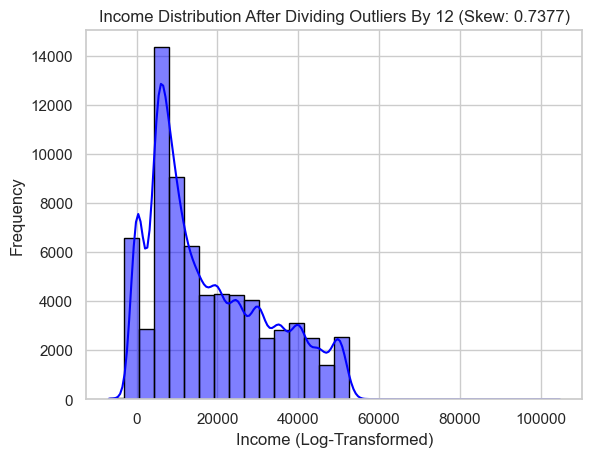

In [31]:
df_processed_copy = df_processed.copy()

# Divide by 12 the income values above the 75th percentile (monthly income)
df_processed_copy['income'] = np.where(df_processed_copy['income'] > df_processed_copy['income'].quantile(0.75), df_processed_copy['income'] / 12, df_processed_copy['income'])

# Plot the distribution
sns.histplot(df_processed_copy['income'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title(f'Income Distribution After Dividing Outliers By 12 (Skew: {df_processed_copy["income"].skew():.4f})')
plt.xlabel('Income (Log-Transformed)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()